<a href="https://colab.research.google.com/github/anubhavgupta1/Deep-Learning-Using-TensorFlow/blob/master/2_Training_an_MNIST_DATA_with_Plain_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


!mkdir -p drive
!google-drive-ocamlfuse drive

import os
os.chdir("drive/")
!ls

sample_data
E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144865 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.23-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.23-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.23-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0

In [2]:
!pip install tensorflow==1.10.0

     |████████████████████████████████| 58.4MB 82kB/s 
     |████████████████████████████████| 12.2MB 45.6MB/s 
     |████████████████████████████████| 573kB 31.1MB/s 
     |████████████████████████████████| 3.3MB 40.9MB/s 
ERROR: xarray 0.15.1 has requirement numpy>=1.15, but you'll have numpy 1.14.5 which is incompatible.
ERROR: xarray 0.15.1 has requirement setuptools>=41.2, but you'll have setuptools 39.1.0 which is incompatible.
ERROR: umap-learn 0.4.6 has requirement numpy>=1.17, but you'll have numpy 1.14.5 which is incompatible.
ERROR: tifffile 2020.9.3 has requirement numpy>=1.15.1, but you'll have numpy 1.14.5 which is incompatible.
ERROR: spacy 2.2.4 has requirement numpy>=1.15.0, but you'll have numpy 1.14.5 which is incompatible.
ERROR: seaborn 0.11.0 has requirement numpy>=1.15, but you'll have numpy 1.14.5 which is incompatible.
ERROR: plotnine 0.6.0 has requirement numpy>=1.16.0, but you'll have numpy 1.14.5 which is incompatible.
ERROR: pandas 1.1.4 has requirement num

In [3]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

from matplotlib.colors import ListedColormap
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

In [4]:
# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

#**FNN for MNIST**

##**Using plain TensorFlow**

In [5]:
mnist = input_data.read_data_sets("data/")
mnist

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f24701aecf8>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f247eecf2b0>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f247eecf198>)

<class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>
(784,)
(55000, 784)
(10000, 784)
(28, 28)
(55000,)
(10000,)
3


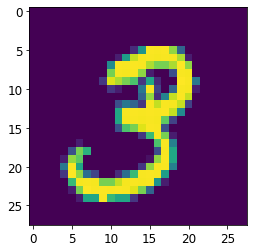

In [6]:
print(type(mnist))
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")
print(X_train[1].shape)
print(X_train.shape)
print(X_test.shape)
print(X_train[1].reshape(28, -1).shape)
print(y_train.shape)
print(y_test.shape)
print(y_train[1])
plt.imshow(X_train[1].reshape(28, -1))

###**1. Construction Phase**

In [7]:
print(len(X_train[0]))
n_inputs = 28*28  # MNIST
n_hidden1 = 100
n_hidden2 = 200
n_hidden3 = 300
n_outputs = 10

784


###**2. Defining placeholders**

In [8]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [9]:
print(X.get_shape())

(?, 784)


In [10]:
N_inputs = int(X.get_shape()[1])
stddev = 2 / np.sqrt(N_inputs)
print(stddev)

0.07142857142857142


In [11]:
#tf.truncated_normal() selects random numbers from a normal distribution 
#whose mean is close to 0 and values are close to 0. For example, from -0.1 to 0.1. 
#It's called truncated because your cutting off the tails from a normal distribution.
init = tf.truncated_normal((N_inputs, 200), stddev=stddev)
print(init)

Tensor("truncated_normal:0", shape=(784, 200), dtype=float32)


###**3. Let's define a function for creating the layers of out DNN**

In [12]:
def Details(x, y, w,b,z):
  print("-------------------------------------------------------------------------")
  print("Shape is : " + str(x))
  print("The number of inputs : " + str(x[1]))
  print("The number of output neurons : " + str(y))
  print("Weights : " + str(w))
  print("Bias : " + str(b))
  print("Z  : " + str(z))
  print("-------------------------------------------------------------------------")


In [13]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        Details(X.get_shape(),n_neurons, W.get_shape(), b.get_shape(), Z.get_shape())
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [14]:
y = tf.nn.relu(0.6)
with tf.Session() as s:
    print(y.eval())

0.6


In [15]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",activation=tf.nn.relu)
    hidden3 = neuron_layer(hidden2, n_hidden3, name="hidden3",activation=tf.nn.relu)
    logits = neuron_layer(hidden3, n_outputs, name="outputs")

-------------------------------------------------------------------------
Shape is : (?, 784)
The number of inputs : 784
The number of output neurons : 100
Weights : (784, 100)
Bias : (100,)
Z  : (?, 100)
-------------------------------------------------------------------------
-------------------------------------------------------------------------
Shape is : (?, 100)
The number of inputs : 100
The number of output neurons : 200
Weights : (100, 200)
Bias : (200,)
Z  : (?, 200)
-------------------------------------------------------------------------
-------------------------------------------------------------------------
Shape is : (?, 200)
The number of inputs : 200
The number of output neurons : 300
Weights : (200, 300)
Bias : (300,)
Z  : (?, 300)
-------------------------------------------------------------------------
-------------------------------------------------------------------------
Shape is : (?, 300)
The number of inputs : 300
The number of output neurons : 10
Weights 

###**4. Using dense instead of neuron_layer function( )**

####**4.1 Defining Placeholders**

In [16]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [17]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",activation=tf.nn.relu)
    hidden3 = tf.layers.dense(hidden2, n_hidden3, name="hidden3",activation=tf.nn.relu)
    logits = tf.layers.dense(hidden3, n_outputs, name="outputs")

###**5. Defining the loss function**

In [18]:
# For regression:
# with tf.name_scope("regloss"):
#     loss = tf.reduce_mean(tf.square(y-logits), name="regloss")

In [19]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

###**6. Defining the gradient descent optimizer**

In [20]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

###**7. Specifying how to evaluate the model**

In [21]:
result = tf.nn.in_top_k([[0.1, 0.8, 0.3, 0.6, 0.5]], [4], 2)
result

<tf.Tensor 'in_top_k/InTopKV2:0' shape=(1,) dtype=bool>

In [22]:
with tf.Session() as s:
    print(result.eval())

[False]


In [23]:
#returns index of highest value
np.argmax([0.1, 0.9, 0.3, 0.2, 0.5, 0.8,55])

6

In [24]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

###**8. Initialize variables and create saver**

In [25]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

###**9. Define the number of epochs**

In [26]:
n_epochs = 40
batch_size = 50

In [27]:
mnist.train.num_examples // batch_size

1100

###**10. Train the model**

In [28]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: mnist.validation.images,
                                            y: mnist.validation.labels})
        print(epoch, "Train accuracy:", acc_train, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "model_ckps/my_model_final.ckpt")

0 Train accuracy: 0.86 Val accuracy: 0.8954
1 Train accuracy: 0.92 Val accuracy: 0.917
2 Train accuracy: 0.92 Val accuracy: 0.9282
3 Train accuracy: 0.96 Val accuracy: 0.9376
4 Train accuracy: 0.94 Val accuracy: 0.9454
5 Train accuracy: 0.9 Val accuracy: 0.9504
6 Train accuracy: 0.94 Val accuracy: 0.9556
7 Train accuracy: 0.96 Val accuracy: 0.9578
8 Train accuracy: 0.96 Val accuracy: 0.9628
9 Train accuracy: 0.98 Val accuracy: 0.964
10 Train accuracy: 0.98 Val accuracy: 0.964
11 Train accuracy: 0.94 Val accuracy: 0.9664
12 Train accuracy: 1.0 Val accuracy: 0.9676
13 Train accuracy: 0.94 Val accuracy: 0.9668
14 Train accuracy: 1.0 Val accuracy: 0.9702
15 Train accuracy: 1.0 Val accuracy: 0.9714
16 Train accuracy: 1.0 Val accuracy: 0.9696
17 Train accuracy: 1.0 Val accuracy: 0.9714
18 Train accuracy: 1.0 Val accuracy: 0.9728
19 Train accuracy: 1.0 Val accuracy: 0.9736
20 Train accuracy: 1.0 Val accuracy: 0.974
21 Train accuracy: 1.0 Val accuracy: 0.9748
22 Train accuracy: 1.0 Val accurac

###**11. Using the Neural Network**

In [29]:
with tf.Session() as sess:
    saver.restore(sess, "model_ckps/my_model_final.ckpt") # or better, use save_path
    X_new_scaled = mnist.test.images[:20]
    y_actual = mnist.test.labels[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from model_ckps/my_model_final.ckpt


In [30]:
!ls -l model_ckps/

total 672
-rw-r--r-- 1 root root     95 Dec  4 17:48 checkpoint
-rw-r--r-- 1 root root 648040 Dec  4 17:48 my_model_final.ckpt.data-00000-of-00001
-rw-r--r-- 1 root root    367 Dec  4 17:48 my_model_final.ckpt.index
-rw-r--r-- 1 root root  38016 Dec  4 17:48 my_model_final.ckpt.meta


In [31]:
print("Predicted classes:", y_pred)
print("Actual classes:   ",  y_actual)

Predicted classes: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
